In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"


In [5]:
df = pd.read_csv("Instagram data.csv", encoding="ISO-8859-1")



In [6]:
# Display column names
column_names = df.columns.tolist()
print("Column Names:", column_names)

# Get column info
column_info = df.info()
print("Column Info:")
print(column_info)


Column Names: ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
C

In [7]:
# Assuming 'df' is your DataFrame containing the data
descriptive_stats = df.describe()
print(descriptive_stats)


        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

In [8]:
# Assuming 'df' is your DataFrame
# Check for missing values in the entire DataFrame
missing_values = df.isna().any().any()  # Returns True if any missing value is found, otherwise False

# Alternatively, you can check for missing values column-wise
missing_values_per_column = df.isna().any()  # Returns a Series indicating which columns contain missing values

# You can also count the number of missing values in each column
missing_values_count_per_column = df.isna().sum()  # Returns a Series with the count of missing values in each column


C:\Users\Kishwar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


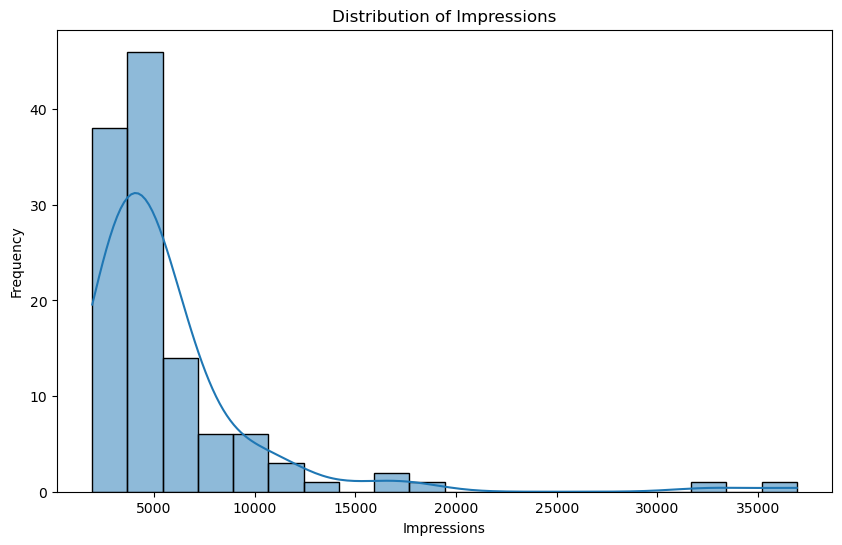

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the Instagram Reach data
# Plotting a histogram to visualize the distribution of Impressions
plt.figure(figsize=(10, 6))
sns.histplot(df['Impressions'], bins=20, kde=True)
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame containing the Instagram post data with a column 'Date' for the post date and 'Impressions' for the number of impressions
df.reset_index(inplace=True)  # Reset index to make 'Date' a regular column
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Impressions'], marker='o', linestyle='-')
plt.title('Number of Impressions on Each Post Over Time')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Instagram post data with columns 'Date', 'Likes', 'Saves', and 'Follows'
# Make sure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting metrics over time
plt.figure(figsize=(10, 6))

# Plot Likes
plt.plot(df['Date'], df['Likes'], marker='o', linestyle='-', label='Likes')

# Plot Saves
plt.plot(df['Date'], df['Saves'], marker='o', linestyle='-', label='Saves')

# Plot Follows
plt.plot(df['Date'], df['Follows'], marker='o', linestyle='-', label='Follows')

plt.title('Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Metrics')
plt.legend()  # Add legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


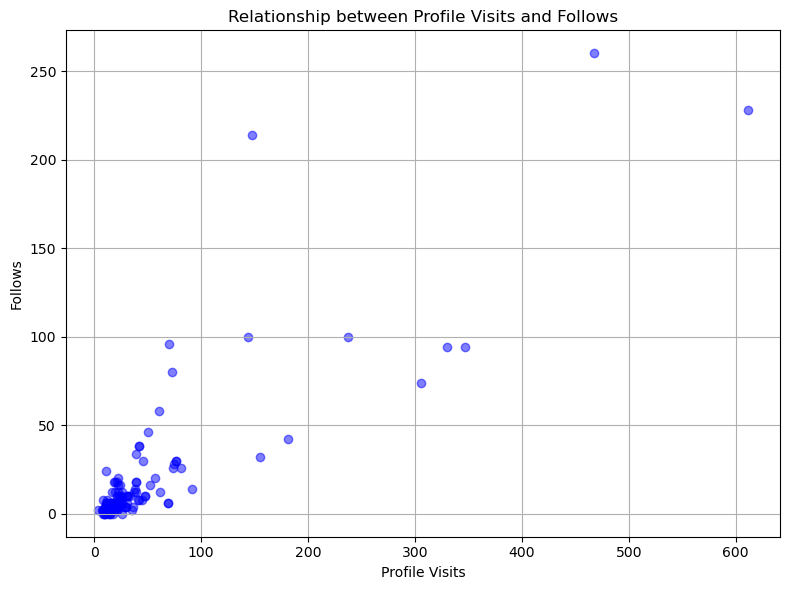

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Instagram data with columns 'Profile Visits' and 'Follows'

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Profile Visits'], df['Follows'], color='blue', alpha=0.5)  # Scatter plot
plt.title('Relationship between Profile Visits and Follows')  # Title of the plot
plt.xlabel('Profile Visits')  # X-axis label
plt.ylabel('Follows')  # Y-axis label
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


In [19]:
# Drop any non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 level_0     index  Impressions  From Home  From Hashtags  \
level_0         1.000000  1.000000     0.379437   0.240749       0.188930   
index           1.000000  1.000000     0.379437   0.240749       0.188930   
Impressions     0.379437  0.379437     1.000000   0.844698       0.560760   
From Home       0.240749  0.240749     0.844698   1.000000       0.177516   
From Hashtags   0.188930  0.188930     0.560760   0.177516       1.000000   
From Explore    0.400041  0.400041     0.893607   0.800573       0.190453   
From Other      0.213069  0.213069     0.592960   0.555666       0.229623   
Saves           0.333164  0.333164     0.779231   0.768817       0.305929   
Comments       -0.130367 -0.130367    -0.028524   0.012716       0.161439   
Shares          0.246781  0.246781     0.634675   0.674985       0.219511   
Likes           0.285868  0.285868     0.849835   0.698330       0.662124   
Profile Visits  0.222590  0.222590     0.760981   0.5310